###  Importing necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing data

In [2]:
df = pd.read_csv(r'C:\Users\Hectic\space_mission_launches\cleaned_starting_file\mission_launches_df_cleaned.csv')

### Viewing DataFrame

In [3]:
df

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Status: Active,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,Status: Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,Status: Active,No Info,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Status: Active,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,Status: Active,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,Status: Retired,No Info,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,Status: Retired,No Info,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,Status: Retired,No Info,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,Status: Retired,No Info,Success


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Graphs

#### Checking how many different Organisation values DataFrame has

In [4]:
df.Organization.value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


#### Checking how many unique values Organization column has

In [5]:
print("There are {} different values in the 'Organization' column.".format(df['Organization'].nunique()))

There are 56 different values in the 'Organization' column.


### Bar chart for number of launches by Organization based on Organization column

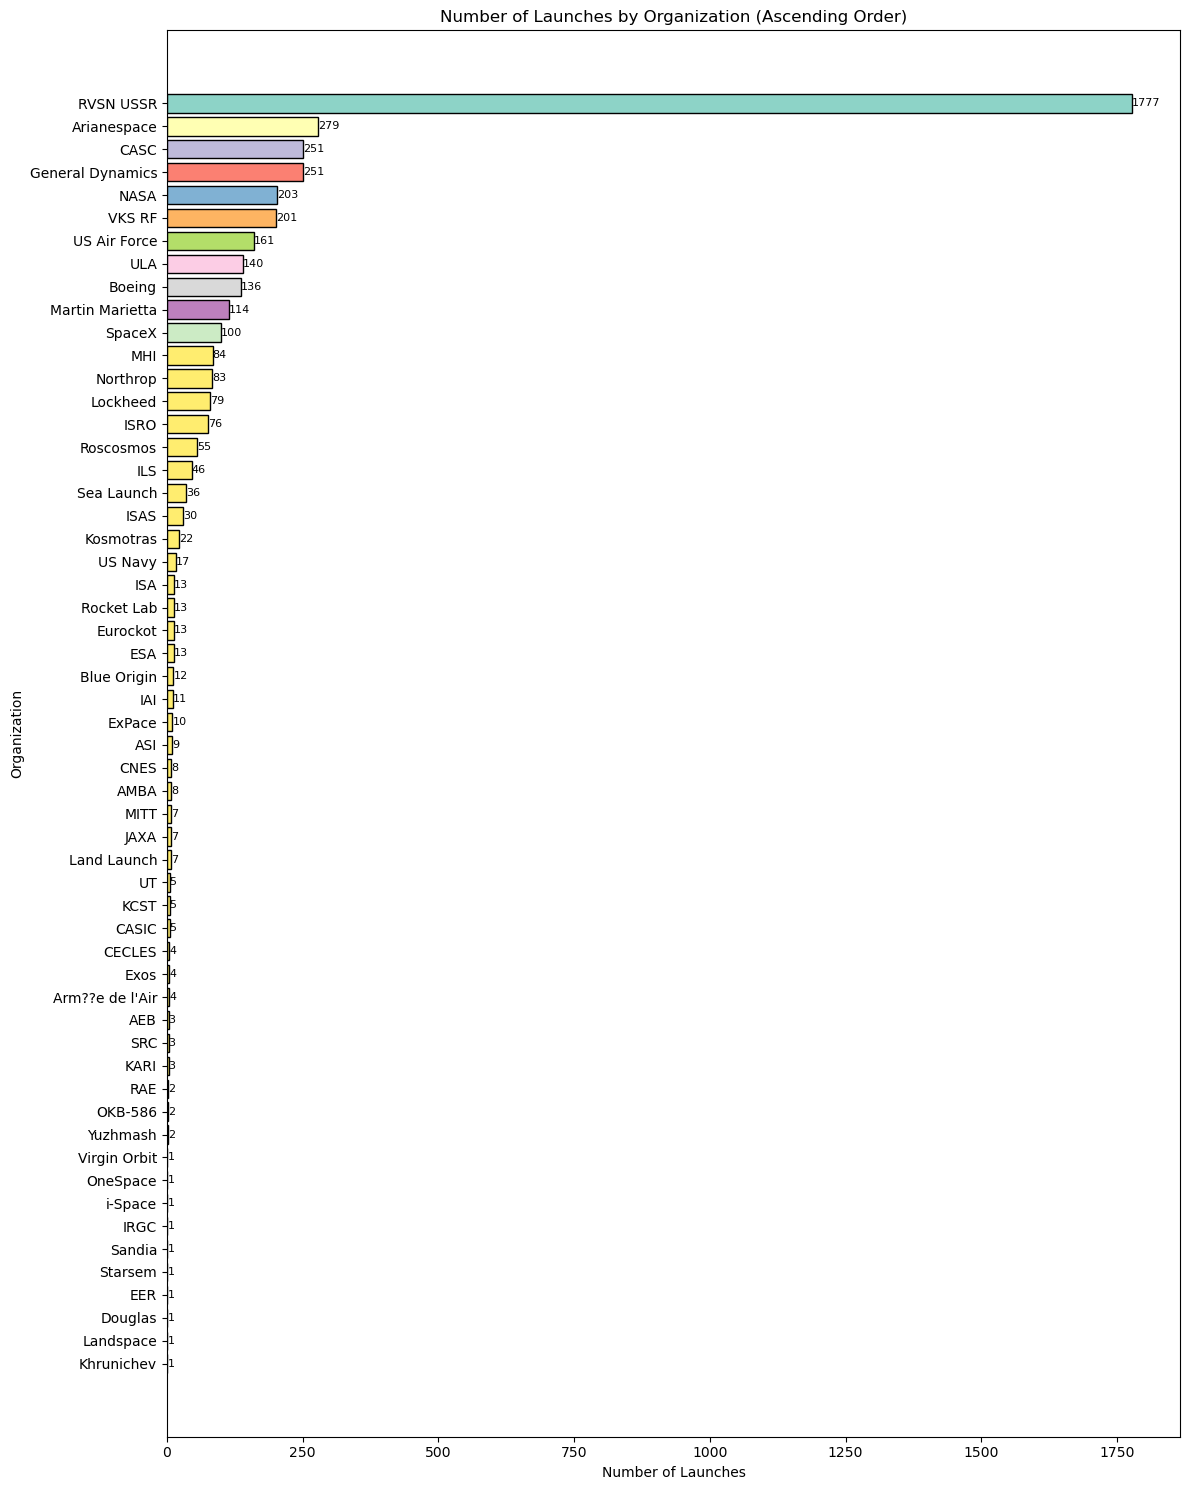

In [6]:
organization_counts = df['Organization'].value_counts()

# Sort organizations by the number of launches in ascending order
organization_counts = organization_counts.sort_values(ascending=True)

plt.figure(figsize=(12, 15))
bars = plt.barh(organization_counts.index, organization_counts, color=plt.cm.Set3(range(len(organization_counts)))[::-1], height=0.8, edgecolor='black')

plt.title('Number of Launches by Organization (Ascending Order)')
plt.xlabel('Number of Launches')
plt.ylabel('Organization')

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.tight_layout()
plt.show()

#### Checking how many unique values Location column has

In [7]:
print("There are {} different values in the 'Location' column.".format(df['Location'].nunique()))

There are 137 different values in the 'Location' column.


#### Bar chart for top 10 locations based on Location column

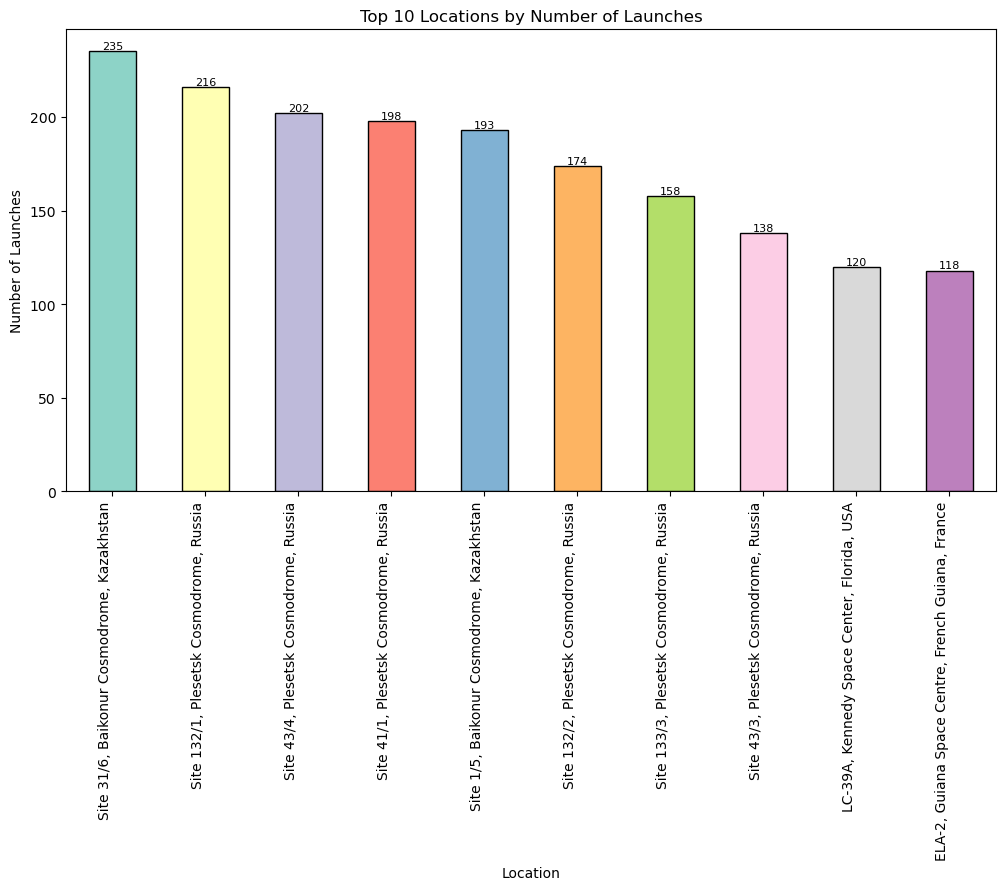

In [8]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(top_locations)))
bars = top_locations.plot(kind='bar', color=colors, edgecolor='black')  # Add black outline

plt.title('Top 10 Locations by Number of Launches')
plt.xlabel('Location')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90, ha='right')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=8, color='black')

plt.show()

### Checking how many different countries Location column has to see where space mission launches have taken place

#### Extracting country name from Location column

In [9]:
df['Country'] = df['Location'].str.split(', ').str[-1]

#### Counting different countries

In [10]:
country_counts = df['Country'].value_counts()
print(country_counts)

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64


#### Checking how many unique values extracted Country column has

In [11]:
print("There are {} different values in the extracted 'Country' column.".format(df['Country'].nunique()))

There are 22 different values in the extracted 'Country' column.


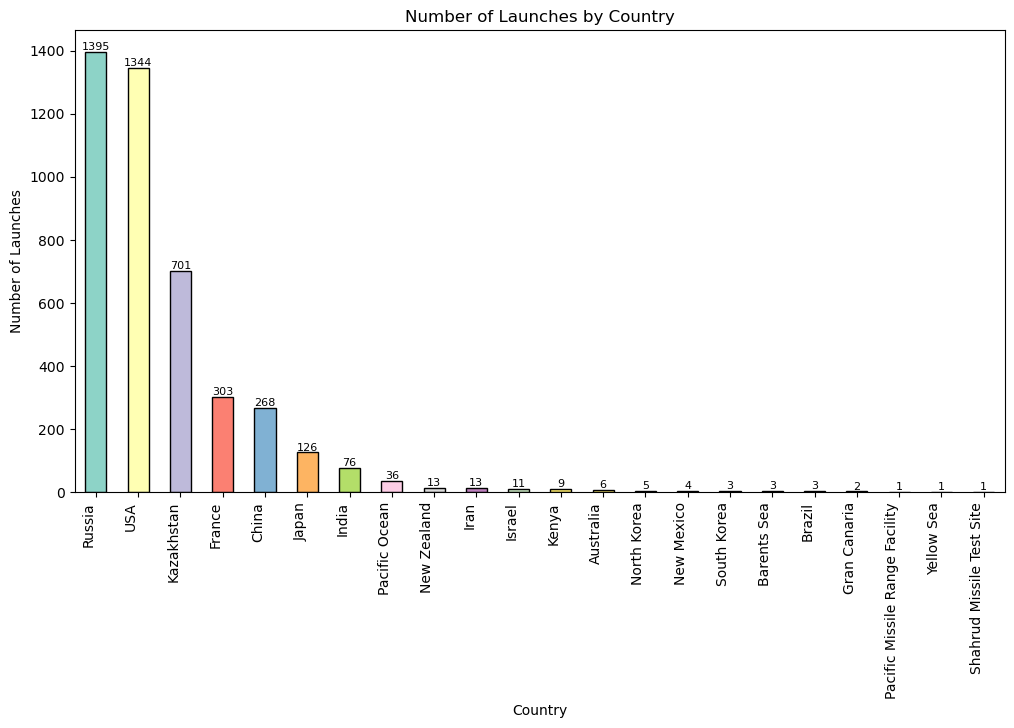

In [12]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(country_counts)))
bars = country_counts.plot(kind='bar', color=colors, edgecolor='black')  # Add black outline

plt.title('Number of Launches by Country')
plt.xlabel('Country')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90, ha='right')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=8, color='black')

plt.show()

#### Line chart for space mission launches over years based on Date column

In [25]:
# Assuming 'Date' is in datetime format, if not, convert it using pd.to_datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Count the number of launches per month
launches_over_time = df['YearMonth'].value_counts().sort_index().reset_index()
launches_over_time.columns = ['YearMonth', 'Count']

# Downsampling to yearly frequency
launches_over_time_resampled = launches_over_time.set_index('YearMonth').resample('Y').sum().reset_index()

# Convert Period to string for serialization
launches_over_time_resampled['YearMonth'] = launches_over_time_resampled['YearMonth'].dt.year.astype(str)

fig = px.line(launches_over_time_resampled, x='YearMonth', y='Count', 
              title='Number of Launches Over Years',
              labels={'YearMonth': 'Year', 'Count': 'Number of Launches'},
              line_shape='linear', line_dash_sequence=['solid'], 
              template='plotly_white')

fig.update_xaxes(tickangle=90, tickmode='array', tickvals=launches_over_time_resampled.index, 
                 ticktext=launches_over_time_resampled['YearMonth'])

fig.show()